# Определение успешных закономерностей игры 

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». 

### Описание данных

- Name — название игры  
- Platform — платформа  
- Year_of_Release — год выпуска  
- Genre — жанр игры  
- NA_sales — продажи в Северной Америке (миллионы проданных копий)  
- EU_sales — продажи в Европе (миллионы проданных копий)  
- JP_sales — продажи в Японии (миллионы проданных копий)  
- Other_sales — продажи в других странах (миллионы проданных копий)  
- Critic_Score — оценка критиков (максимум 100)  
- User_Score — оценка пользователей (максимум 10)  
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Данные за 2016 год могут быть неполными.

**Целью исследования** является выявление закономерностей, определяющих успешность игры . Орделить потенциально популярный продукт чтобы спланировать рекламные кампании на 2017 год.

## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np    
from scipy import stats as st
import seaborn as sns

In [2]:
games = pd.read_csv('games.csv')
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Проанализировав данные, определила, что требуется привести к нижнему регистру наименования столбцов. И изменить тип у столбцов: Year_of_Release к int, User_Score к float64. 
В столбце Name есть два пропуска, данные строки надо будет удалить. Удалим также пустые строки в столбце Year_of_Release.
А вот пропуски в столбцах Critic_Score, User_Score и Rating ничем заменить не получиться. Надо будет изучить строки с отсутствующими данными.

## Предобработка данных

Приведет наименования столбцов к нижнему регистру

In [4]:
games = games.rename(columns={'Name':'name', 'Platform':'platform','Year_of_Release':'year_of_release', 'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'})
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
#удалим пустые строки в столбцах year_of_release
games.dropna(subset=['year_of_release', 'name'], inplace=True)

#приведем столбец к типу int
#games['year_of_release'].value_counts()
games['year_of_release'] = games['year_of_release'].astype('int')

games['user_score'] = games['user_score'].fillna(0)
games.loc[(games['user_score'] =='tbd'),'user_score'] = 0
games['user_score'] = games['user_score'].astype('float64')

games['rating'] = games['rating'].fillna('unknown')

games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [6]:
games['all_sales'] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,0.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,0.0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,0.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,0.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,0.0,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,0.0,unknown,0.01


In [7]:
games['critic_score'].min()

13.0

In [8]:
games['critic_score'] = games['critic_score'].fillna(0)

games['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

### Вывод

Привела к нижнему регистру название столбцов.
Удалила строки с пустыми значениями в столбцах year_of_release и name. 

Поменяла тип у year_of_release на int (в данном столбце указан год выпуска, год это всегда целочисленное число).
Поменяли тип у user_score на float34 (в данном столбце даны оценки пользователей, который имеют также дробную часть). В этом же столбце были строчные значения tbd (To Be Determined, то есть "Будет определено"), т е оценка этим играм еще не была дана. Посмотрев уникальные значения в этом столбце, не обнаружила игр с оценкой 0. Поэтому все пропуски и tbd заменим на 0. И в дальнейшем будем учитывать, что это игры с отсутвуещей оценкой, а не с оценкой 0.

Издания, освещающие рынок игр, стали появляться во второй половине 90-х (IGN в 1996, Igromania в 1997 и тд). Вполне вероятно, что далеко не всем играм, выпущенным до 1996 года, критики ставили оценки. Опять же, так как данные не за полный 2016 год, то и там вероятно наблюдать пустые значения. Заменять оценку critic_score на что-то расчетное и субьективное было бы некорректно. В столбце critic_score поступили столбцу user_score: нашли минимальное значение, 13, и заменили все пропуски на 0. Ноль здесь тоже будет обозначать отсутствие оценки, а не оценку равную 0.

Организация (ESRB), присуждающая рейтинги играм была основана в 1994 году. Соответственно, далеко не всем играм, выпущенным до этого года, присуждался рейтинг. Опять же вероятно рейтинга может еще не быть в свежих играх, так как организация просто не успела его присвоить. Заменять этот рейтинг на что-то расчетное и субьективное было бы некорректно. Оставим пропуски как есть.  

Создали новый столбец all_sales, в котором отразили суммарные продажи во всех регионах.



## Исследовательский анализ

### Посмотрим сколько игр выпускалось в разные годы

<AxesSubplot:title={'center':'Продажи игр по годам'}, xlabel='year_of_release'>

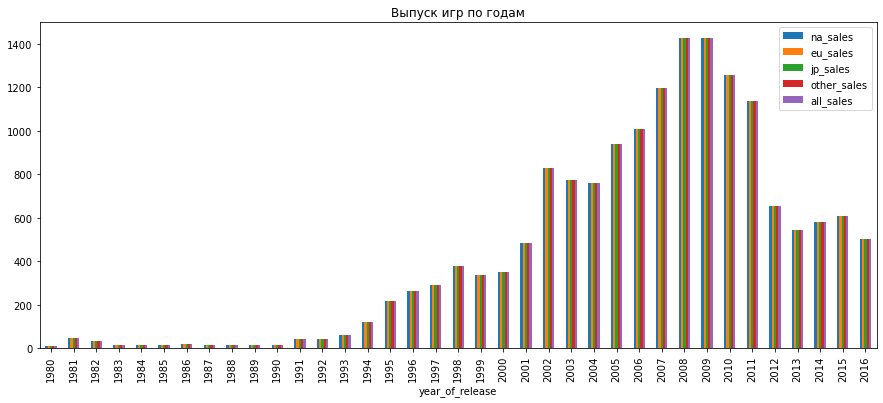

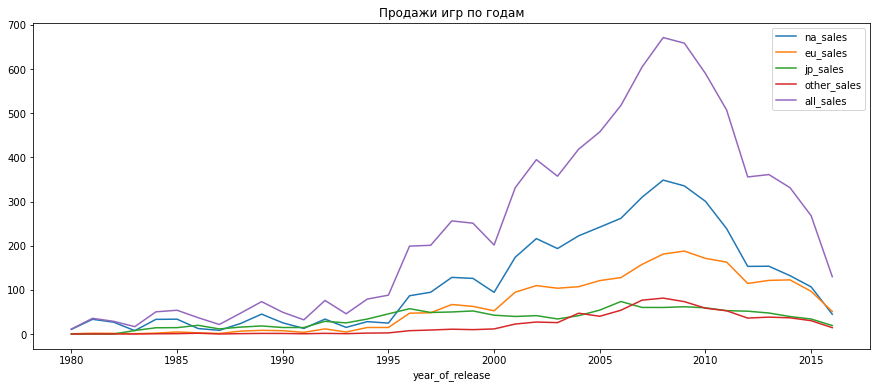

In [9]:
games['year_of_release'].value_counts()
games_year = games[[x for x in games.columns if 'sales' in x] + ['year_of_release']]
games_year = games_year[games_year['year_of_release']!=0]
#display(games_year.groupby('year_of_release').sum())
games_year.groupby('year_of_release').count().plot(kind='bar', figsize=(15,6), title='Выпуск игр по годам')
games_year.groupby('year_of_release').sum().plot(figsize=(15,6), title='Продажи игр по годам')

Как видно пик выпуска игр был в 2008-2009 годах, а потом пошел на снижение. К 2016 году выпуск игр снизился в два раза. 

Продажи игр начали расти начиная с 1995 года и достигли своего пика в 2008 году. Сейчас уровень продаж игр соответсвует примерно 1995 году. Данные до 95 года можно не учитывать в дальнейшем. Так как в то время выпускалось совсем мало количество игр и это не сопоставимо с текущем временем. Да и платформ, для которых эти игры выпускались уже не существует.

### Посмотрим как менялись продажи по платформам

<AxesSubplot:xlabel='platform'>

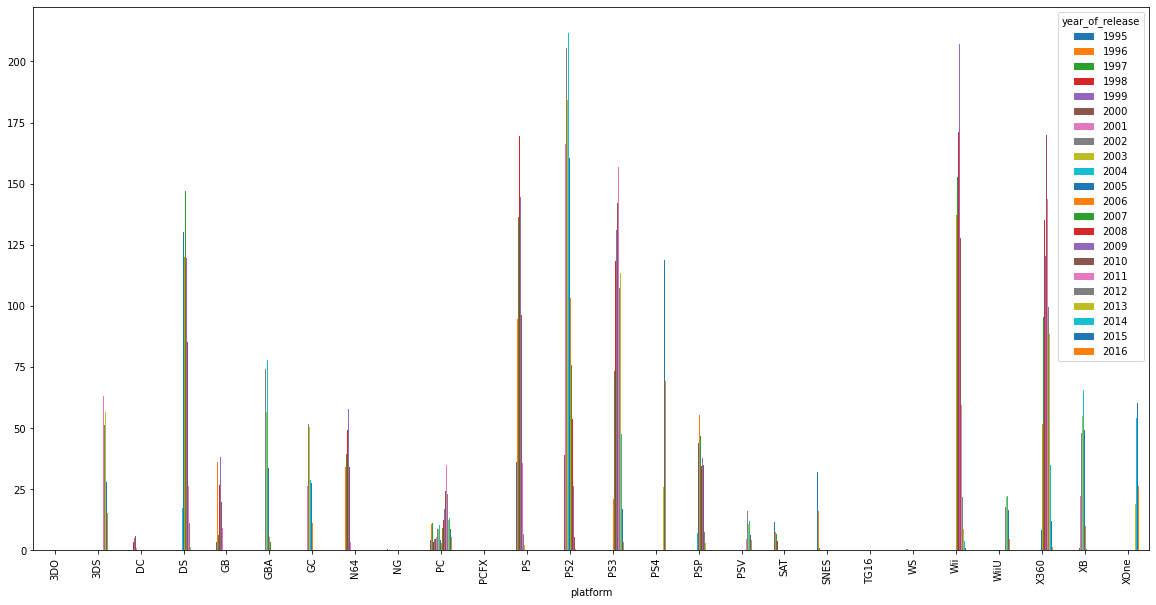

In [10]:
games_1995 = games[games['year_of_release']>=1995]
#games_platfom = games[['platform']+[x for x in games.columns if 'sales' in x]]
games_platform = games_1995.pivot_table(index=['platform'],columns='year_of_release', values='all_sales', aggfunc='sum')
#games_platfom = games_platfom[games_platfom['year_of_release']]
#games_platfom = games_platfom.groupby('platform').sum()

games_platform.plot(kind='bar', figsize=(20,10), linewidth=2)

#games_platform

Постоили график продаж по всем платформам с 1995 года. Видно, что больше всего продавались игры для платформ: PS2, Wii, X360,PS,PS3,DS,PS4. Продажи для остальных платформ значительно ниже.

Постоим этот же график только для лидирующих платформ.

<AxesSubplot:title={'center':'Продажи игр ТОП платформ по годам'}, xlabel='year_of_release'>

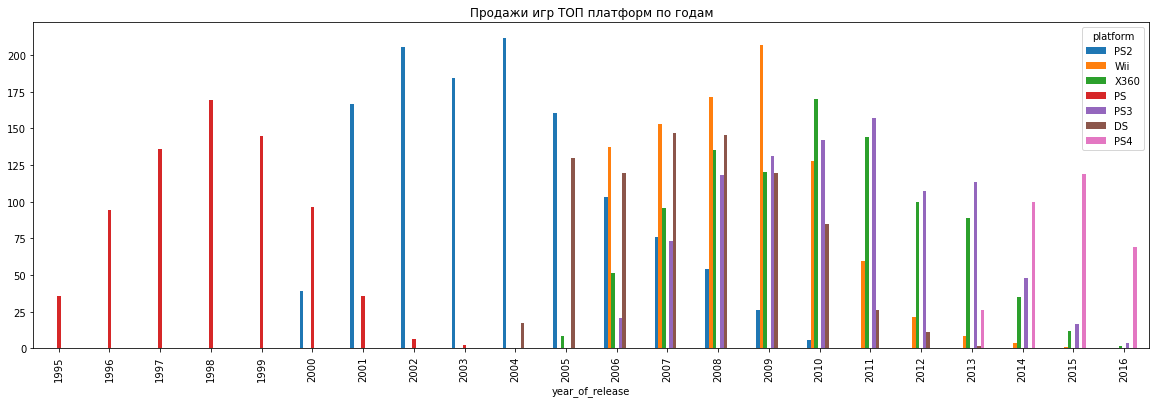

In [11]:
lead_platform = ['PS2', 'Wii', 'X360','PS','PS3','DS','PS4']
#games_platform_leader = games_platform.query('index in @lead_platform')
games_platform_leader_2 = games_1995.pivot_table(index=['year_of_release'],columns='platform', values='all_sales', aggfunc='sum')
#games_platform_leader_2 = games_platform_leader_2.query('columns in @lead_platform')
#sns.barplot(games_platform_leader, x=games_platform_leader.columns)
games_platform_leader_2 = games_platform_leader_2[lead_platform]
games_platform_leader_2.plot(kind='bar', figsize=(20,6), legend=True, title= 'Продажи игр ТОП платформ по годам')
#games_platform_leader_2
#games_platform_leader

<AxesSubplot:title={'center':'Ящик с усами по всем продажам по ТОП платформам'}>

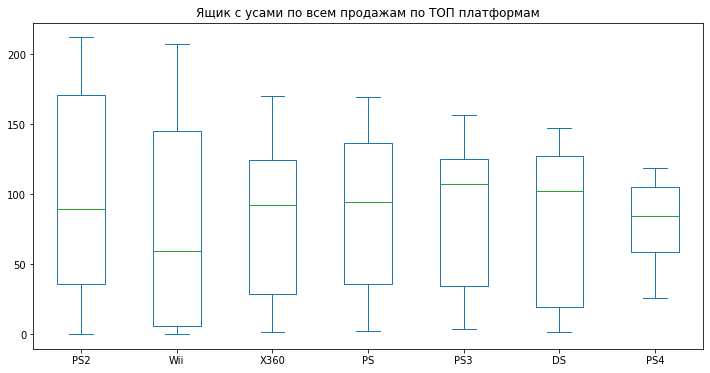

In [12]:
games_platform_leader_2.plot(kind='box', figsize=(12,6), legend=True, title='Ящик с усами по всем продажам по ТОП платформам')

На графике видно, что лидером по продажам за все время своего существования является платформа PS2. И вообще платформы PS, PS2, PS3, PS4 являются лидерами на этом рынке. 

Так же одним из лидеров является платформа X360. 

Общая тенденция рынка(это было видно на графике до этого) к снижению продаж. 

На графике также можно увидеть цикл жизни платформы, примерно 8 лет. Самые успешные платформы имеют цикл жизни более 10 лет. Проверим это, постоив графики.

In [13]:
games_life = games.groupby(['platform','year_of_release']).agg({'all_sales':['sum']}).reset_index()
games_life.columns = ['platform','year_of_release','all_sales']
games_life['platform'].value_counts()
#games_life

PC      26
GB      13
NES     12
X360    12
PSP     12
PS2     12
Wii     11
DS      11
PS3     11
2600    10
SNES    10
PS      10
XB       9
GBA      8
DC       7
GC       7
N64      7
SAT      6
3DS      6
PSV      6
WiiU     5
GEN      5
NG       4
PS4      4
XOne     4
WS       3
SCD      2
3DO      2
TG16     1
GG       1
PCFX     1
Name: platform, dtype: int64

Если рассмотреть все данные, включая до 1995 года, то видим явного долгожителя платформа PS существовала на рынке 26 лет.

In [14]:
games_life_count = games_life.groupby(['platform']).agg({'year_of_release':'count'})
games_life_count

,year_of_release
platform,
2600,10
3DO,2
3DS,6
DC,7
DS,11
GB,13
GBA,8
GC,7
GEN,5


In [15]:
games_life_count.describe()

,year_of_release
count,31.000000
mean,7.677419
std,5.081910
min,1.000000
25%,4.000000
50%,7.000000
75%,11.000000
max,26.000000


<AxesSubplot:title={'center':'Длительность существования платформ'}, xlabel='platform'>

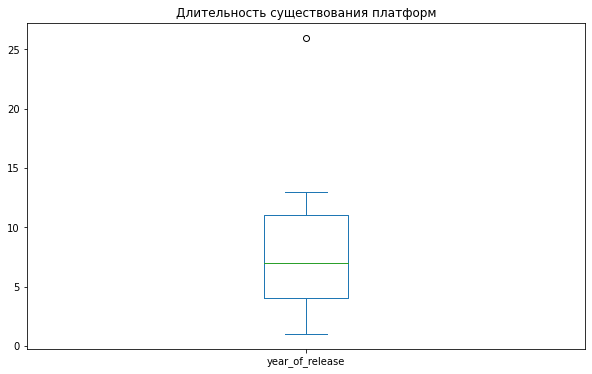

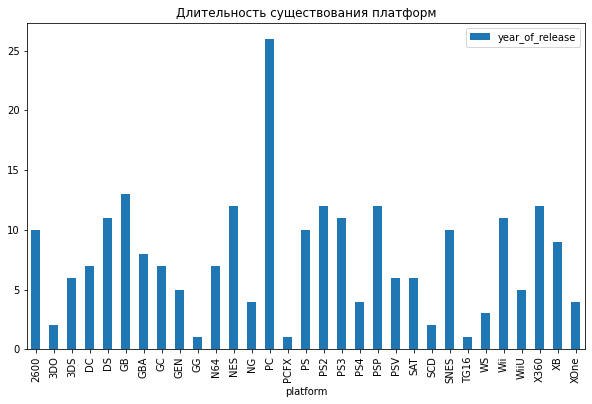

In [16]:
games_life_count.plot(kind='box', figsize=(10,6), title='Длительность существования платформ')
games_life_count.plot(kind='bar',  figsize=(10,6), title='Длительность существования платформ') #histtype='step',
#games_life

Средняя продолжительность цикла жизни платформы на рынке около 7 лет. Но есть платформы, который существовали всего один год. И есть долгожитель PS, который просуществовал на рынке 26 лет.

Разница между медианой и средней не значительная. Это говорит, что выбросов очень мало(точнее один) и это типичный срок существования платформы. 

In [17]:
#посмотрим сколько платформ работало в каждый год 
games_year_count = games_life.groupby(['year_of_release']).agg({'platform':'count'})
games_year_count

,platform
year_of_release,
1980,1
1981,1
1982,1
1983,2
1984,2
1985,4
1986,2
1987,2
1988,4


In [18]:
games_year_count.describe()

,platform
count,37.000000
mean,6.432432
std,3.149432
min,1.000000
25%,4.000000
50%,7.000000
75%,9.000000
max,11.000000


<AxesSubplot:xlabel='year_of_release'>

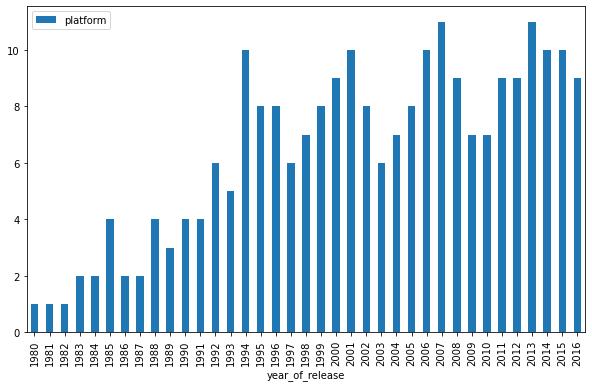

In [19]:
games_year_count.plot( kind='bar', figsize=(10,6)) #kind='bar',

До 1995 года появление новой платформы было примерно раз в два года. А вот с 1995 года начался резкий рост появления новых платформ. И каждые примерно 6-7 лет появляются и исчезают новые платформы.

Определим актуальный период, за который будем рассматривать выборку. 

Ранее определили топовые платформы: PS2, Wii, X360,PS,PS3,DS,PS4.

Но на данные к концу 2016 года половина этих платформ перестали существовать. 

Актуальными остаются PS4, PS3 и X360.  
   
В последние годы продажи растут только PS4 (2016 данные могут быть неполные).   

**В выборке осталось много морально устаревших платформ. Их уже нет в 2016 году, в построении прогноза на 2017 год они нам не помогут.**
**Жизненный цикл платформы 7 лет, соответственно надо рассматривать платформы, который еще не прошли тот период.** 
**Для постороения прогноза на 2017 год будем рассматривать период только с 2013 года.**

Сформируем таблицу только с актуальным периодом.

<AxesSubplot:xlabel='platform'>

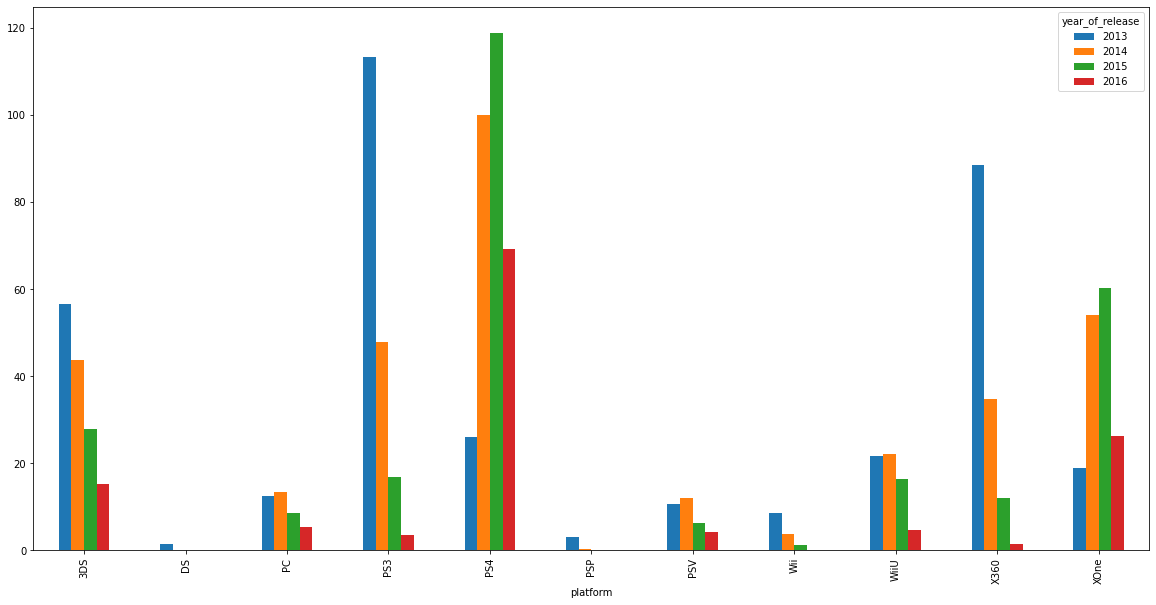

In [20]:
games_2013 = games[games['year_of_release']>=2013]
#games_platfom = games[['platform']+[x for x in games.columns if 'sales' in x]]
games_platform = games_2013.pivot_table(index=['platform'],columns='year_of_release', values='all_sales', aggfunc='sum')
#games_platfom = games_platfom[games_platfom['year_of_release']]
#games_platfom = games_platfom.groupby('platform').sum()

games_platform.plot(kind='bar', figsize=(20,10), linewidth=2)

<AxesSubplot:title={'center':'Продажи игр ТОП платформ по годам'}, xlabel='year_of_release'>

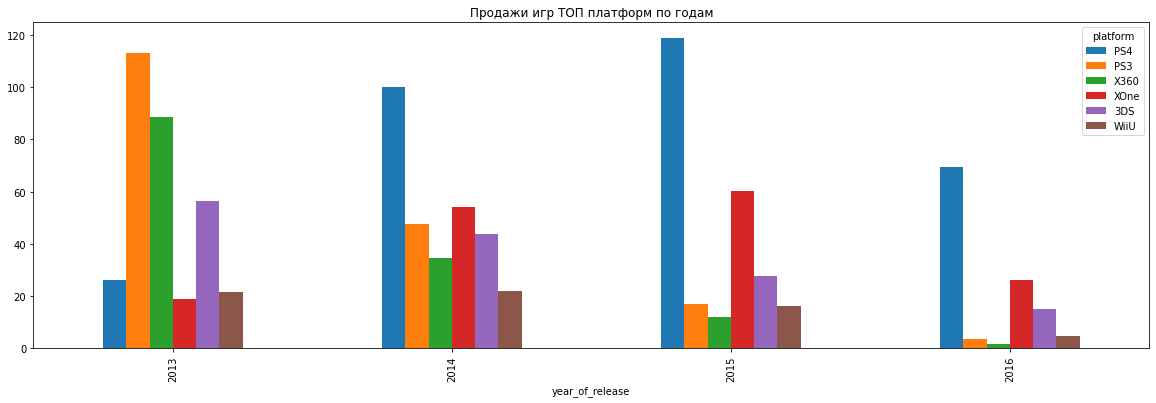

In [21]:
lead_platform_2013 = ['PS4', 'PS3', 'X360','XOne','3DS','WiiU']

games_platform_leader_2 = games_2013.pivot_table(index=['year_of_release'],columns='platform', values='all_sales', aggfunc='sum')

games_platform_leader_2 = games_platform_leader_2[lead_platform_2013]
games_platform_leader_2.plot(kind='bar', figsize=(20,6), legend=True, title= 'Продажи игр ТОП платформ по годам')

Как мы видем, лидеры поменялись. В 2016 году на рынке лидирует PS4 с большим отрывом от ближайшего конкурента XOne. Платформы PS3 и X360 практически исчезли с рынка.

In [22]:
games_2013['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы критиков.
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

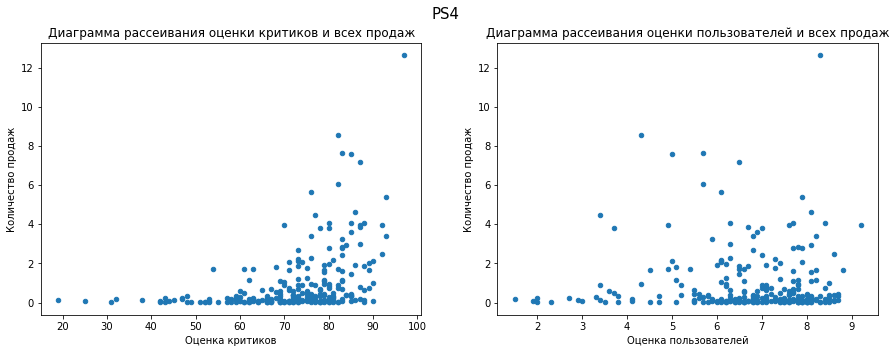

Коэффициент корреляции между оценкой критиков и количеством продаж PS4 : 0.40656790206178095
Коэффициент корреляции между оценкой пользоватлей и количеством продаж PS4 : -0.0027302031571732836
----------------------------------------------------------------------------------------------------------


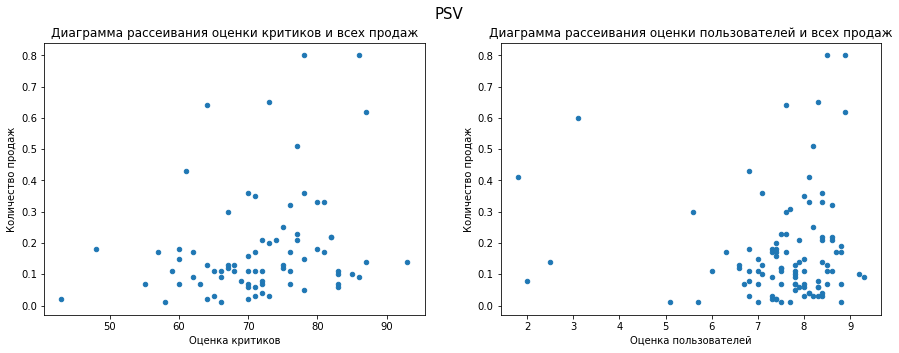

Коэффициент корреляции между оценкой критиков и количеством продаж PSV : 0.2547423503068656
Коэффициент корреляции между оценкой пользоватлей и количеством продаж PSV : 0.2041669379426917
----------------------------------------------------------------------------------------------------------


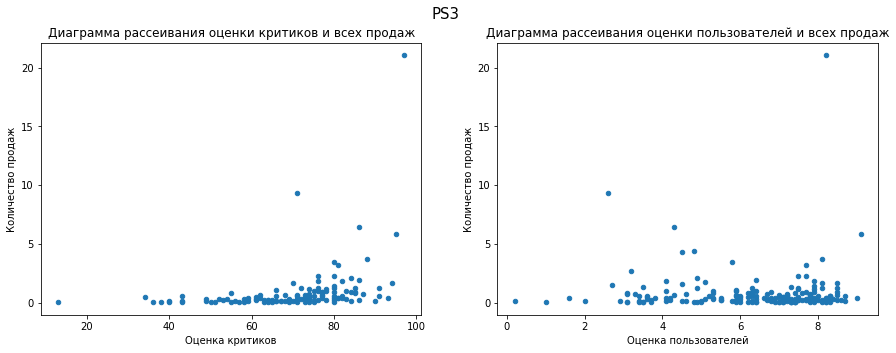

Коэффициент корреляции между оценкой критиков и количеством продаж PS3 : 0.3342853393371919
Коэффициент корреляции между оценкой пользоватлей и количеством продаж PS3 : 0.034284026381417955
----------------------------------------------------------------------------------------------------------


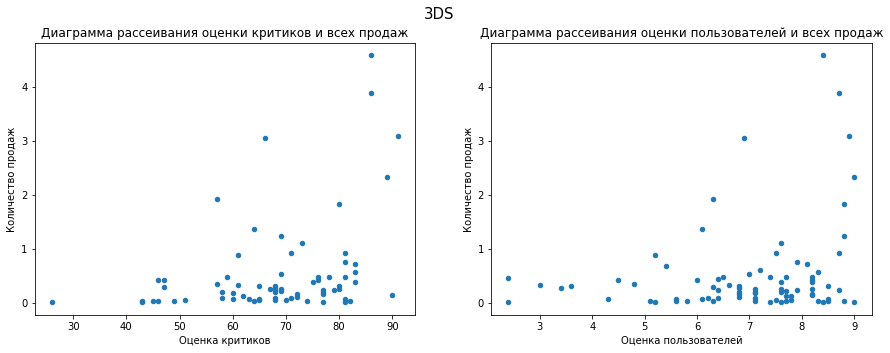

Коэффициент корреляции между оценкой критиков и количеством продаж 3DS : 0.3570566142288103
Коэффициент корреляции между оценкой пользоватлей и количеством продаж 3DS : 0.2760325656859302
----------------------------------------------------------------------------------------------------------


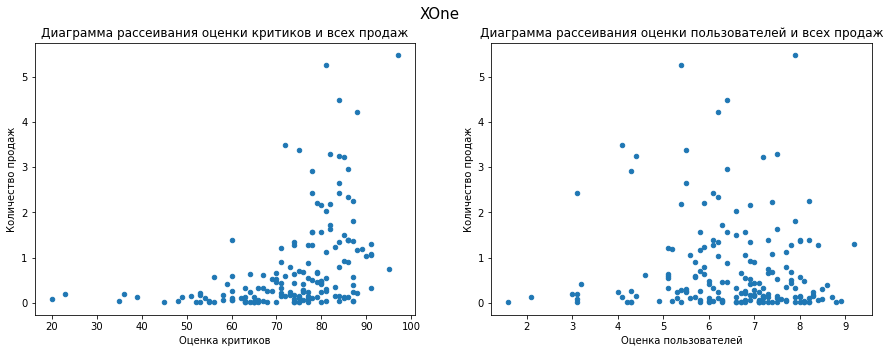

Коэффициент корреляции между оценкой критиков и количеством продаж XOne : 0.4169983280084017
Коэффициент корреляции между оценкой пользоватлей и количеством продаж XOne : -0.008912891419336011
----------------------------------------------------------------------------------------------------------


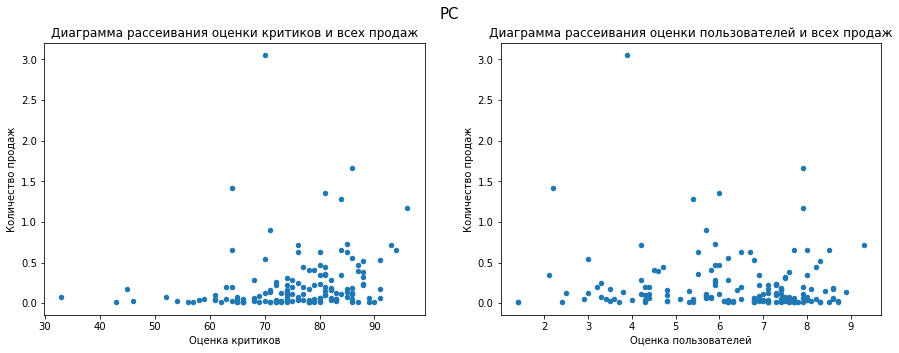

Коэффициент корреляции между оценкой критиков и количеством продаж PC : 0.19603028294369382
Коэффициент корреляции между оценкой пользоватлей и количеством продаж PC : -0.09270616964076125
----------------------------------------------------------------------------------------------------------


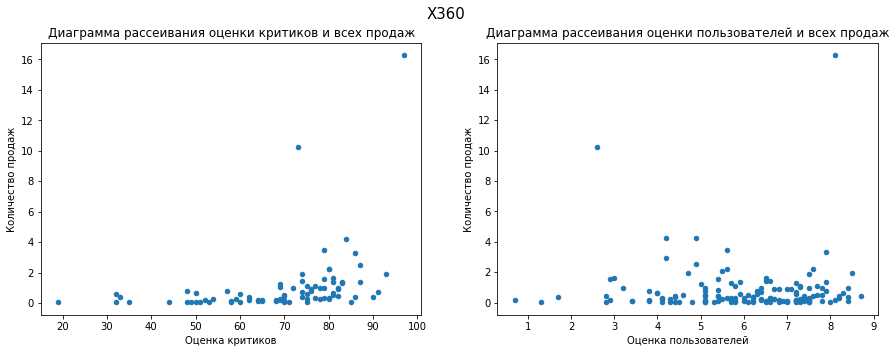

Коэффициент корреляции между оценкой критиков и количеством продаж X360 : 0.3503445460228664
Коэффициент корреляции между оценкой пользоватлей и количеством продаж X360 : -0.006238179532306317
----------------------------------------------------------------------------------------------------------


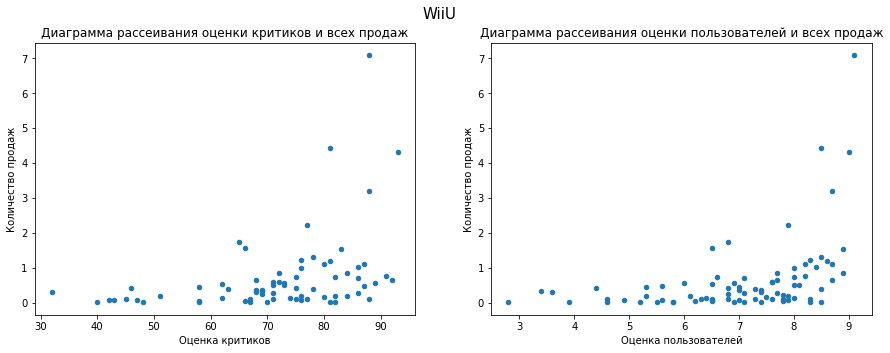

Коэффициент корреляции между оценкой критиков и количеством продаж WiiU : 0.3764149065423912
Коэффициент корреляции между оценкой пользоватлей и количеством продаж WiiU : 0.3704456439735251
----------------------------------------------------------------------------------------------------------


In [23]:
platform_2013=['PS4','PSV','PS3','3DS','XOne','PC', 'X360','WiiU']

def corr_platform (name):
    plt.suptitle(name, fontsize=15)
    games_2013_critic = games_2013[((games_2013['platform']==name) & (games_2013['critic_score']!=0))]
    games_2013_critic.plot(kind='scatter', x='critic_score', y='all_sales', xlabel='Оценка критиков', ylabel='Количество продаж', title='Диаграмма рассеивания оценки критиков и всех продаж', ax= plt.subplot(1,2,1), figsize=(15,5))
    games_2013_user = games_2013[((games_2013['platform']==name) & (games_2013['user_score']!=0))]
    games_2013_user.plot(kind='scatter', x='user_score', y='all_sales', xlabel='Оценка пользователей', ylabel='Количество продаж', title='Диаграмма рассеивания оценки пользователей и всех продаж', ax= plt.subplot(1,2,2), figsize=(15,5))
    plt.show()
    print('Коэффициент корреляции между оценкой критиков и количеством продаж',name,':', games_2013_critic['critic_score'].corr(games_2013_critic['all_sales']))
    print('Коэффициент корреляции между оценкой пользоватлей и количеством продаж',name,':', games_2013_critic['user_score'].corr(games_2013_critic['all_sales']))
    print('----------------------------------------------------------------------------------------------------------')
for i in platform_2013:
    corr_platform(i)

В основном корреляция между оценками пользователей и продажами либо не выявлена, либо очень слабая. Исключение составляет только платформа WiiU, где покупатели прислушиваются к оценке пользователей.  
При этом корелляция между оценками критиков и обьемами продаж в основном средняя. 
**Т.е. покупатели больше верят критикам, чем другим игрокам.**

Посмотрим на общее распределение игр по жанрам. И определим какие жанры являются самыми прибыльными и наоборот.

<AxesSubplot:title={'center':'Продажи игр по жанрам'}, xlabel='genre'>

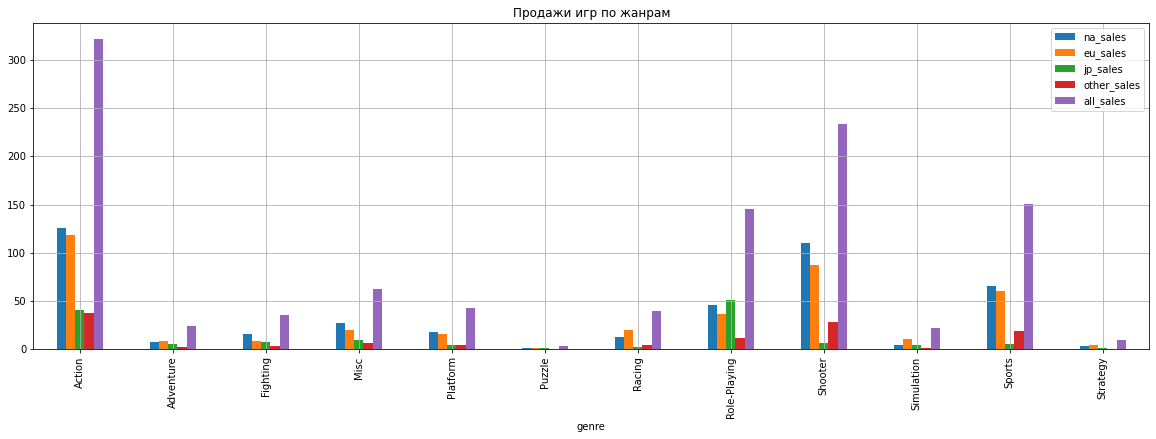

In [24]:
games_genre = games_2013[['genre'] + [x for x in games.columns if 'sales' in x]]
#games_genre
games_genre.groupby('genre').sum().plot(kind='bar', figsize=(20,6), title='Продажи игр по жанрам', grid=True)


<AxesSubplot:title={'center':'Выпуск игр по жанрам'}, xlabel='genre'>

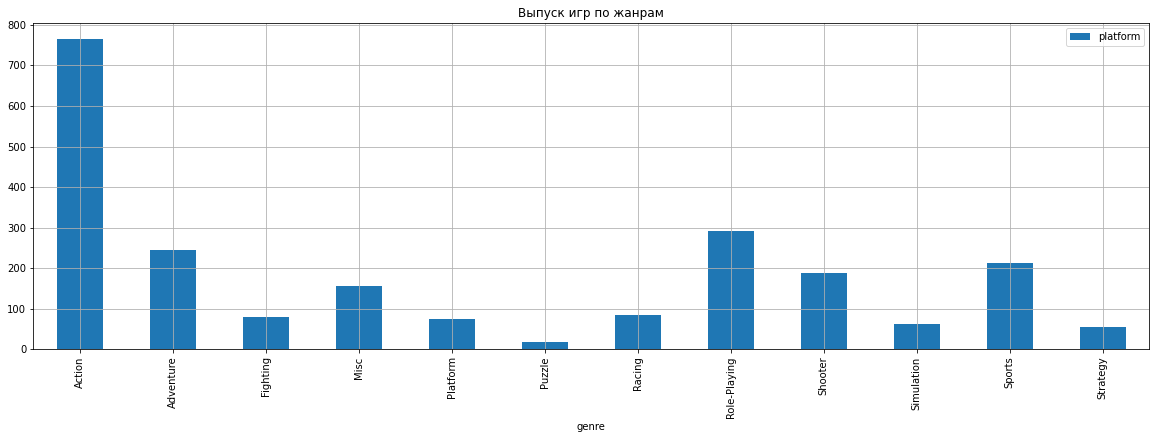

In [25]:
games_genre_pl = games_2013[['genre'] + ['platform']]
games_genre_pl.groupby('genre').count().plot(kind='bar', figsize=(20,6), title='Выпуск игр по жанрам', grid=True)
#games_genre_pl.groupby('genre').count()

Из графиков видно, что больше всего выпускают игры жанра являтся Action. А меньше всего выпускают игры жанра Puzzle.

По продажам лидерует жанр Action и Shooter. Интересно, что игр в жанре Shooter выпускают почти в четыре раза меньше, чем Action. Самые низкие продажи у Strategy и Puzzle.  

По продажам в разрезе по регионам лидеры сохраняются как и в глобальных продажах. Кроме Японского региона. В этом регионе на первом месте у Role-Playing. 

### Вывод по исследовательскому анализу данных:

- Время жизни платформы примерно 7 лет. 

- Топ-платформ которые остались актуальными и функционируют последние годы, а именно с 2013 года: 'PS4', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV'.      

- Продажи в целом только падают. И значительно перераспределяются доли между платформами. Если в 2013 году была заметная лидирующая позиция X360 и 3DS, то к 2015 продажи X360 значительно снизились. 

- Лидером продаж в настоящее время попрежнему остается PS4. Далее в порядке убывания обьемов: 'XOne', '3DS', 'WiiU' и примерно равные 'PC', 'PSV'

- В основном корреляция между оценками пользователей и продажами либо не выявлена, либо очень слабая. Исключение составляет только платформа WiiU, где покупатели прислушиваются к оценке пользователей. При этом корелляция между оценками критиков и обьемами продаж в основном средняя. Т.е. покупатели больше верят критикам, чем другим игрокам.

- Самыми популярными являются жанры Action и Shooter. Самые провальные жанры Strategy и Puzzle.

## Портрет пользователя каждого региона  

Определим для пользователя каждого региона (NA, EU, JP):

- самые популярные платформы (топ-5).
- самые популярные жанры (топ-5)
- влияет ли рейтинг ESRB на продажи в отдельном регионе

<AxesSubplot:title={'center':'Продажи игр по платформам'}, xlabel='platform'>

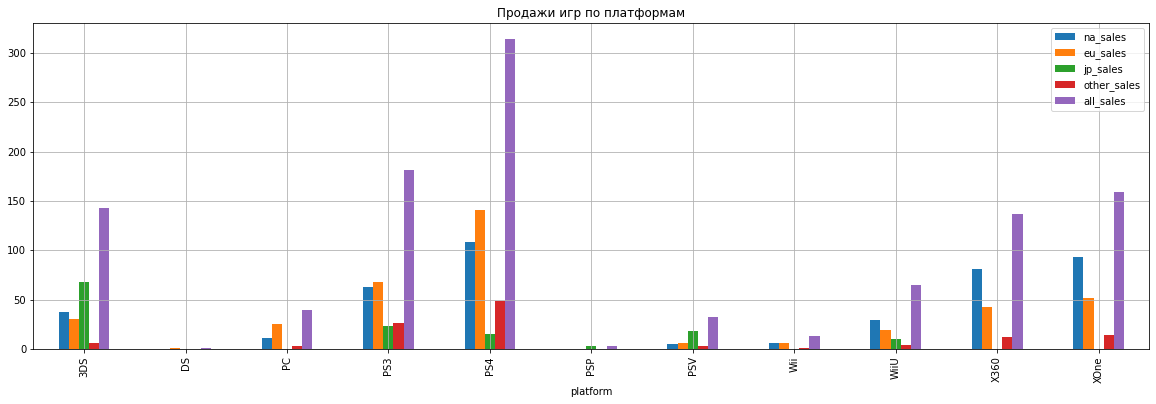

In [26]:
games_pl_region = games_2013[['platform'] + [x for x in games.columns if 'sales' in x]]
games_pl_region.groupby('platform').sum().plot(kind='bar', figsize=(20,6), title='Продажи игр по платформам', grid=True)

In [27]:
region = ['na_sales','eu_sales','jp_sales']

for i in region:
    print('ТОП-5 платформ',i)
    print('')
    reg = games_pl_region.groupby('platform').sum().sort_values(by=i, ascending=False)
    print(reg[i].head())
    print('--------------------------------------------------------')
    print('')

ТОП-5 платформ na_sales

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64
--------------------------------------------------------

ТОП-5 платформ eu_sales

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64
--------------------------------------------------------

ТОП-5 платформ jp_sales

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64
--------------------------------------------------------



<AxesSubplot:title={'center':'Продажи игр по жанрам'}, xlabel='genre'>

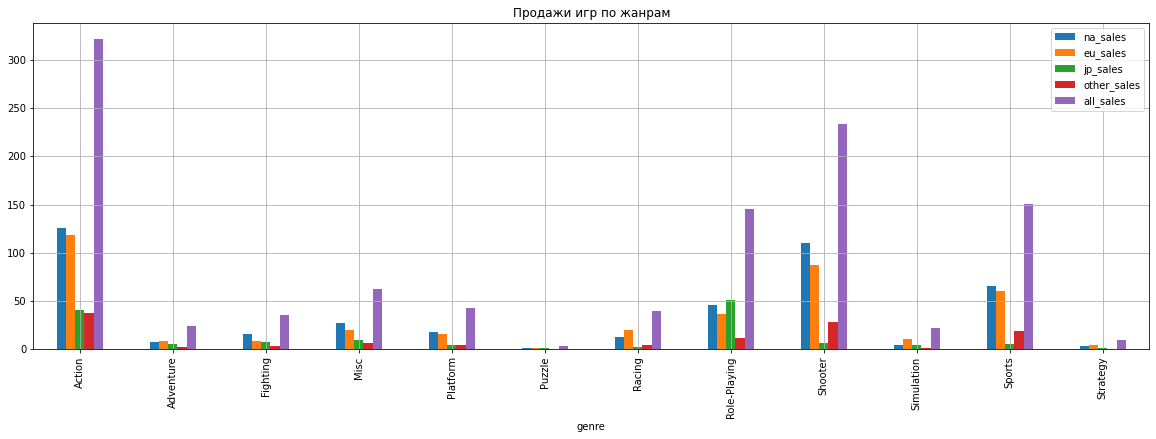

In [28]:
games_genre.groupby('genre').sum().plot(kind='bar', figsize=(20,6), title='Продажи игр по жанрам', grid=True)

In [29]:
for i in region:
    print('ТОП-5 жанров',i)
    print('')
    reg = games_genre.groupby('genre').sum().sort_values(by=i, ascending=False)
    print(reg[i].head())
    print('--------------------------------------------------------')
    print('')

ТОП-5 жанров na_sales

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64
--------------------------------------------------------

ТОП-5 жанров eu_sales

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64
--------------------------------------------------------

ТОП-5 жанров jp_sales

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64
--------------------------------------------------------



In [30]:
games_rating = games_2013.pivot_table(index = ['rating'], values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum').reset_index()    
games_rating

,rating,eu_sales,jp_sales,na_sales
0,E,83.36,15.14,79.05
1,E10+,42.69,5.89,54.24
2,M,145.32,14.11,165.21
3,T,41.95,20.59,49.79
4,unknown,78.91,85.05,89.42


Обозначение:
na_sales red
eu_sales green
jp_sales blue


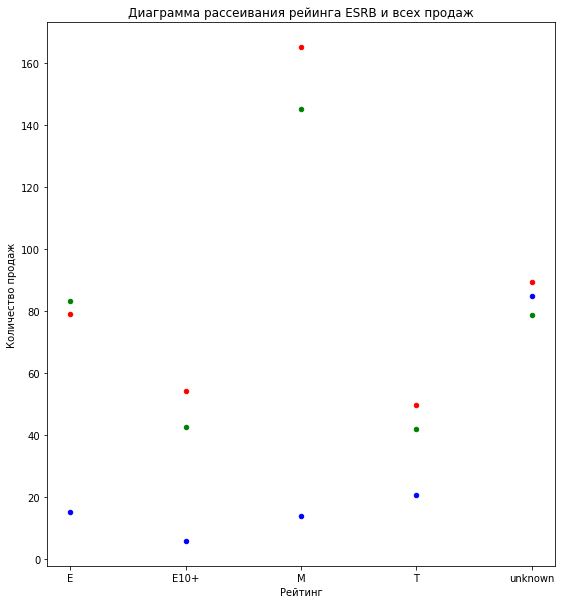

In [34]:
color=['red', 'green', 'blue']
print('Обозначение:')
for i in range(len(region)):
    col = color[i]
    games_rating.plot(kind='scatter', x='rating', y=region[i], xlabel='Рейтинг', ylabel='Количество продаж', color = col, title='Диаграмма рассеивания рейинга ESRB и всех продаж',ax= plt.subplot(1,2,1), figsize=(20,10))
    print(region[i],color[i])
    

### Вывод

Самые популярные платформы в na_sales и eu_sales платформа PS4. Платформа PS3 уже начал отходить в na_sales, а в eu_sales еще пользуется популярностью и занимает вторую строку. Оставшие три платформы в этих регионах пользуются популярностью в одинаковом порядке.

В регионе jp_sales совсем другие лидеры. Платформа 3DS является беспорным лидером, при этом в других двух регионах занимает последнюю позицию. PS4 только набирает обороты в этом регионе, и поэтому пока большей популярностью пользуется PS3. Так в топе находятся две плаформы, которые не попали в топ в другиз регионах. Это PSV и WiiU.

Первые четыре места в ТОП жанров в регионах na_sales и eu_sales совпадают. А пятое место в na_sales занимает Misc, в а eu_sales - Racing. Американцы предпочитают музыку, а европейцы погонять.

А вот jp_sales совсем другие лидеры: первое место занимает Role-Playing. Action тоже популярны в этом регионе и занимают второе место. И эти два жанра занимают почти 80% рынка игр. Осташиеся двадцать делят  Misc, Fighting и Shooter. В jp_sales регионе совершенно не популярны спортивные игры, им на смену пришли игры с боями.

Посмотрим документацию по рейтингам ESRB:
- Everyone (E)
- Everyone 10+ (E10+)
- Teen (T)
- Mature 17+ (M)

В Европе и Америке самые популярные игры с рейтингом М, т е для аудитории 17+. В Японии же на рейтинг вообще не смотрят. Самые популярные игры - это игры без рейтинга. Получается рейтинг влияет на продажи в Европе и Америке, а в Японии нет.

## Проверка гипотез

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;     
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.   
Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [32]:
#найдем средние рейтинги
print('Средний пользовательский рейтинг XOne')
display(games_2013[games_2013['platform'] == 'XOne']['user_score'].mean())
print('Средний пользовательский рейтинг PC')
display(games_2013[games_2013['platform'] == 'PC']['user_score'].mean())
#посчитаем дисперсии
print('Дисперсия рейтингов XOne')
display(np.var(games_2013[games_2013['platform'] == 'XOne']['user_score']))
print('Дисперсия рейтингов PC')
display(np.var(games_2013[games_2013['platform'] == 'PC']['user_score']))
#запустим тест
alpha = 0.05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    games_2013[games_2013['platform'] == 'XOne']['user_score'], 
    games_2013[games_2013['platform'] == 'PC']['user_score'],
    equal_var=False
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Средний пользовательский рейтинг XOne


4.805263157894736

Средний пользовательский рейтинг PC


5.14179894179894

Дисперсия рейтингов XOne


9.644061367994878

Дисперсия рейтингов PC


8.273014753226388

p-значение: 0.24400999542744453
Не получилось отвергнуть нулевую гипотезу


**Вывод**: Значение p-value чуть больше 24%.   
В результате, мы не можем отвергнуть нулевую гипотезу. Это значит, что Средние пользовательские рейтинги платформ Xbox One и PC - одинаковые.  
Чтобы отвергнуть нулевую гипотезу, необходимо увеличить доверительный интервал до 24%

### Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.   
Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различаются.

In [33]:
#найдем средние рейтинги
print('Средний пользовательский рейтинг Action')
display(games_2013[games_2013['genre'] == 'Action']['user_score'].mean())
print('Средний пользовательский рейтинг Sports')
display(games_2013[games_2013['genre'] == 'Sports']['user_score'].mean())
#посчитаем дисперсии
print('Дисперсия рейтингов Action')
display(np.var(games_2013[games_2013['genre'] == 'Action']['user_score']))
print('Дисперсия рейтингов Sports')
display(np.var(games_2013[games_2013['genre'] == 'Sports']['user_score']))
#запустим тест
alpha = 0.05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    games_2013[games_2013['genre'] == 'Action']['user_score'], 
    games_2013[games_2013['genre'] == 'Sports']['user_score'],
    equal_var=False
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Средний пользовательский рейтинг Action


3.4723237597911254

Средний пользовательский рейтинг Sports


3.9163551401869157

Дисперсия рейтингов Action


12.581322798573876

Дисперсия рейтингов Sports


7.539685780417494

p-значение: 0.051807560603891564
Не получилось отвергнуть нулевую гипотезу


**Вывод**:Значение p-value чуть больше 5%.   
В результате, мы не можем отвергнуть нулевую гипотезу. Это значит, что Средние пользовательские рейтинги платформ Xbox One и PC - одинаковые.  
Чтобы отвергнуть нулевую гипотезу, необходимо увеличить доверительный интервал до 6%

## 6. Общий вывод

Предоставленные данные были обработаны на предмет пропущенных значений, некорректных данных и некорректных типов данных.  

Основное число игр вышло в период с 1995. Но строить прогноз на 2017 год, основываясь на данные продаж по платформам, которых уже не существует - некорректно, поэтому первоначально данные до 1995 отбрасываем.
Время жизни платформы примерно 7 лет. Также было замечено, что ряд топ платформ этого периода стали неакутальны в период с 2012 по 2013 года. Строить прогноз на 2017 год по платформам, которые исчезли некорректно. Было принято решение оставить данные с 2013 года.   

Топ-платформ которые остались актуальными и функционируют последние годы, а именно с 2013 года: 'PS4', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV'.      

Продажи игр в целом только падают. И значительно перераспределяются доли между платформами. Если в 2013 году была заметная лидирующая позиция X360 и 3DS, то к 2015 продажи X360 значительно снизились.

Лидером продаж в настоящее время остается PS4. Далее в порядке убывания обьемов: 'XOne', '3DS', 'WiiU' и примерно равные 'PS3' и 'X360'.

В основном корреляция между оценками пользователей и продажами** либо не выявлена, либо очень слабая. Исключение составляет только платформа WiiU, где покупатели прислушиваются к оценке пользователей.   
При этом корелляция между оценками критиков и обьемами продаж в основном средняя. Т.е. покупатели больше верят критикам, чем другим игрокам.

Самыми популярными являются жанры Action и Shooter. Самый провальный жанр Puzzle.   

В Европе и Америке практически одинаковый ТОП платформ: PS4, XOne, X360, 3DS и PS3. С той разницей, что в Америка платформа PS3 уже устарела и нахожится на 4 месте по продажам, а в Европе ее еще активно используют и она на 2 месте.

Аналогичная картинка в Европе и Америка по жанрам. Лидируют: Action, Shooter, Sports, Role-Playing. В Европе замыкает рейтинг Racing, в Америке же Misc.

Япония разительно отличается от описанных регионов. Здесь лидирует платформа 3DS, устаревшая PS3 и карманная PSV.Замыкают рейтинг PS4 и WiiU. Также сильно отличается ситуация по жанрам. Лидируют Role-Playing, за ним Action. Далее с сильным отрывом Misc, Fighting, которого нет в Америке и Европе. Замыкает рейтинг Shooter, который сильно ценится Европе и Америке.

В Европе и Америке самые популярные игры с рейтингом М, т е для аудитории 17+. В Японии же на рейтинг вообще не смотрят. Самые популярные игры - это игры без рейтинга. Получается рейтинг влияет на продажи в Европе и Америке, а в Японии нет. 

Сделав тесты на проверку гипотез, сделаны выводы:   
В первом тесте значение p-value чуть больше 24%.   
В результате, мы не можем отвергнуть нулевую гипотезу. Это значит, что Средние пользовательские рейтинги платформ Xbox One и PC - одинаковые.   
Во втором тесте значение  p-value чуть больше 5%.
И здесь мы не можем отвергнуть нулевую гипотезу.  
Т.е. средние пользовательские рейтинги платформ Xbox One и PC - одинаковые.

В итоге, что касается прогноза будущих продаж: лучше брать данные начиная с 2013 года. При этом, в 2017 года большую часть прибыли будут приносить игры жанров Action и Shooter, для платформы PS4 и с рейтингом Mature 17+ (M). 